#Biomedical Data Science Project
###by Benjamin Straus (bstraus7)

##Data

### Importing, Formatting, and Processing Data

In [1]:
# Summary: I will perform some regression to predict number of accidents for an airline based on the amount flown (in seat*km/week)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import statsmodels.formula.api as smf
import statsmodels as sm

from sklearn import linear_model
import statsmodels.api as sm

sns.set()

! if [ ! -e airline-safety.csv ]; \
then wget https://raw.githubusercontent.com/fivethirtyeight/data/master/airline-safety/airline-safety.csv; \
fi;
  
dat = pd.read_csv("airline-safety.csv")


--2019-10-06 02:19:52--  https://raw.githubusercontent.com/fivethirtyeight/data/master/airline-safety/airline-safety.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2265 (2.2K) [text/plain]
Saving to: ‘airline-safety.csv’

airline-safety.csv  100%[===================>]   2.21K  --.-KB/s    in 0s      

2019-10-06 02:19:57 (66.9 MB/s) - ‘airline-safety.csv’ saved [2265/2265]



,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0
5,Air France,3004002661,14,4,79,6,2,337
6,Air India*,869253552,2,1,329,4,1,158
7,Air New Zealand*,710174817,3,0,0,5,1,7
8,Alaska Airlines*,965346773,5,0,0,5,1,88
9,Alitalia,698012498,7,2,50,4,0,0


In [0]:
# Setting up training and testing set

np.random.seed(10)

trainFraction = .7

sample = np.random.uniform(size = np.size(dat[:]['airline'])) < trainFraction
train = dat[ sample]
test =  dat[~sample]


### Basic Scatterplots and Tables

In [12]:
# Exploratory data analysis with tables
dat.head(10)

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0
5,Air France,3004002661,14,4,79,6,2,337
6,Air India*,869253552,2,1,329,4,1,158
7,Air New Zealand*,710174817,3,0,0,5,1,7
8,Alaska Airlines*,965346773,5,0,0,5,1,88
9,Alitalia,698012498,7,2,50,4,0,0


It seems like there is potential for linear fits here.


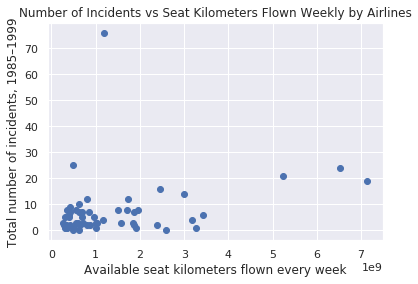

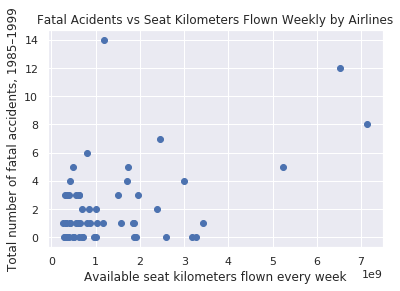

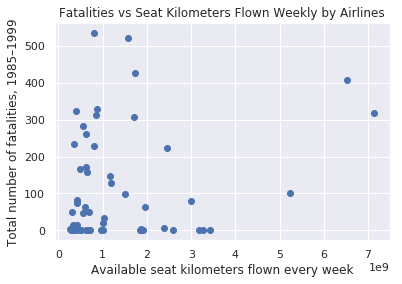

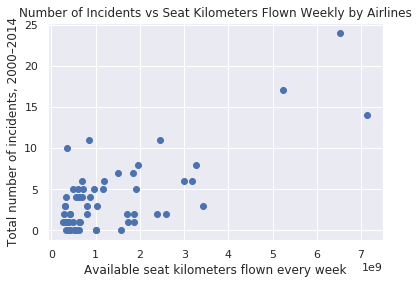

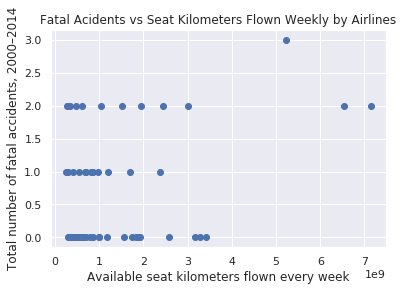

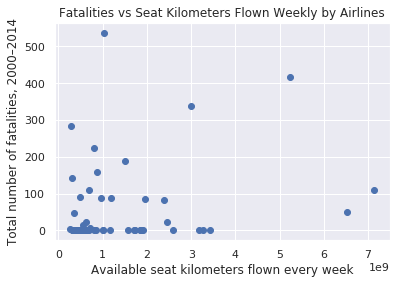

In [11]:
# Exploratory data analysis with plots


plt.plot(dat['avail_seat_km_per_week'],dat['incidents_85_99'],'bo')
plt.xlabel('Available seat kilometers flown every week')
plt.ylabel('Total number of incidents, 1985–1999')
plt.title('Number of Incidents vs Seat Kilometers Flown Weekly by Airlines')

plt.figure()
plt.plot(dat['avail_seat_km_per_week'],dat['fatal_accidents_85_99'],'bo')
plt.xlabel('Available seat kilometers flown every week')
plt.ylabel('Total number of fatal accidents, 1985–1999')
plt.title('Fatal Acidents vs Seat Kilometers Flown Weekly by Airlines')

plt.figure()
plt.plot(dat['avail_seat_km_per_week'],dat['fatalities_85_99'],'bo')
plt.xlabel('Available seat kilometers flown every week')
plt.ylabel('Total number of fatalities, 1985–1999')
plt.title('Fatalities vs Seat Kilometers Flown Weekly by Airlines')

plt.figure()
plt.plot(dat['avail_seat_km_per_week'],dat['incidents_00_14'],'bo')
plt.xlabel('Available seat kilometers flown every week')
plt.ylabel('Total number of incidents, 2000–2014')
plt.title('Number of Incidents vs Seat Kilometers Flown Weekly by Airlines')

plt.figure()
plt.plot(dat['avail_seat_km_per_week'],dat['fatal_accidents_00_14'],'bo')
plt.xlabel('Available seat kilometers flown every week')
plt.ylabel('Total number of fatal accidents, 2000–2014')
plt.title('Fatal Acidents vs Seat Kilometers Flown Weekly by Airlines')

plt.figure()
plt.plot(dat['avail_seat_km_per_week'],dat['fatalities_00_14'],'bo')
plt.xlabel('Available seat kilometers flown every week')
plt.ylabel('Total number of fatalities, 2000–2014')
plt.title('Fatalities vs Seat Kilometers Flown Weekly by Airlines')

print("It seems like there is potential for linear fits here.")

## Model Fitting 


### With Testing different methods

In [5]:
# Using sklearn

X = train[['incidents_85_99', 'incidents_00_14']]
Y = train['avail_seat_km_per_week']
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

Intercept:  449233622.7761866
Coefficients:  [1.41744665e+06 1.95937238e+08]


In [14]:
# Using sci-kit mearn

import numpy as np
from sklearn.linear_model import LinearRegression

x = train[['incidents_85_99', 'incidents_00_14']]
y = train['avail_seat_km_per_week']

model = LinearRegression()

model.fit(x, y)

r_sq = model.score(x, y)
print('r-squared= ',r_sq)



r-squared=  0.26226759548152745


### With Chosen Fitting Package: statsmodel (for OLS)

In [7]:
# Using statsmodel
import numpy as np
import statsmodels.api as sm

xtrain = train[['incidents_85_99', 'incidents_00_14','fatal_accidents_85_99']]
ytrain = train['avail_seat_km_per_week']
xtest = test[['incidents_85_99', 'incidents_00_14','fatal_accidents_85_99']]
ytest = test['avail_seat_km_per_week']

xtrain = sm.add_constant(xtrain)
xtest = sm.add_constant(xtest)

model = sm.OLS(ytrain, xtrain)

results = model.fit()

print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     avail_seat_km_per_week   R-squared:                       0.346
Model:                                OLS   Adj. R-squared:                  0.290
Method:                     Least Squares   F-statistic:                     6.172
Date:                    Sun, 06 Oct 2019   Prob (F-statistic):            0.00176
Time:                            02:20:01   Log-Likelihood:                -863.73
No. Observations:                      39   AIC:                             1735.
Df Residuals:                          35   BIC:                             1742.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


[1.0095834708531368e+18, 1.0643135357951329e+18]


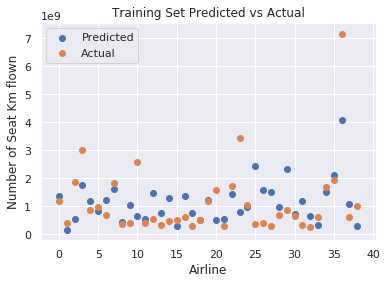

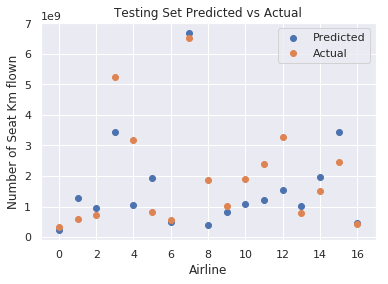

In [8]:
#test.head(10)

yhat_train = np.dot(xtrain,results.params)
yhat_test = np.dot(xtest, results.params)

plt.scatter(np.arange(0,np.shape(yhat_train)[0]),yhat_train)
plt.scatter(np.arange(0,np.shape(ytrain)[0]),ytrain)
plt.legend(['Predicted', 'Actual'])
plt.xlabel('Airline')
plt.ylabel('Number of Seat Km flown')
plt.title('Training Set Predicted vs Actual')

plt.figure()
plt.scatter(np.arange(0,np.shape(yhat_test)[0]),yhat_test)
plt.scatter(np.arange(0,np.shape(ytest)[0]),ytest)
plt.legend(['Predicted', 'Actual'])
plt.xlabel('Airline')
plt.ylabel('Number of Seat Km flown')
plt.title('Testing Set Predicted vs Actual')


print([ np.mean( (ytrain - yhat_train) ** 2), 
        np.mean( (ytest -  yhat_test) ** 2 )])
